# Cleaning data using pandas

In [1]:
import pandas as pd
import numpy as np

In [4]:
cd Downloads

C:\Users\Dell\Downloads


In [5]:
auto_sk = pd.read_csv('Automobile price data _Raw_.csv')

In [6]:
auto_sk

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [7]:
auto_sk['symboling'].unique()

#SYMBOLING REPRESENTS A SCALE OF SAFETY = -3 REPRESENTS PRETTY SAFE, +3 REPRESENTS RISKY

array([ 3,  1,  2,  0, -1, -2], dtype=int64)

In [8]:
auto_sk['normalized-losses'].unique()


#normalized-losses represent avg. losses of payment per insured vehicle per year
#ranging from 65-256

array(['?', '164', '158', '192', '188', '121', '98', '81', '118', '148',
       '110', '145', '137', '101', '78', '106', '85', '107', '104', '113',
       '150', '129', '115', '93', '142', '161', '153', '125', '128',
       '122', '103', '168', '108', '194', '231', '119', '154', '74',
       '186', '83', '102', '89', '87', '77', '91', '134', '65', '197',
       '90', '94', '256', '95'], dtype=object)

In [9]:
auto_sk['normalized-losses'] = auto_sk['normalized-losses'].replace('?',np.nan)

In [10]:
auto_sk['normalized-losses'] = pd.to_numeric(auto_sk['normalized-losses'])

In [11]:
auto_sk['normalized-losses'] = auto_sk['normalized-losses'].fillna(auto_sk['normalized-losses'].mean())

In [12]:
auto_sk.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [13]:
auto_sk['num-of-doors'].unique()
#here i found the (unknown no of doors) in the data

array(['two', 'four', '?'], dtype=object)

In [14]:
auto_sk['num-of-doors'] = auto_sk['num-of-doors'].replace('?',np.nan)

In [15]:
auto_sk['num-of-doors'].unique()

array(['two', 'four', nan], dtype=object)

In [16]:
auto_sk[auto_sk['num-of-doors'].isnull()]

#we can see that make = dodge and mazda both with body style sedan, we search internet or data to fill the nan values

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
27,1,148.0,dodge,gas,turbo,NaN,sedan,fwd,front,93.7,...,98,mpfi,3.03,3.39,7.6,102,5500,24,30,8558
63,0,122.0,mazda,diesel,std,NaN,sedan,fwd,front,98.8,...,122,idi,3.39,3.39,22.7,64,4650,36,42,10795


In [17]:
#Found out that both dodge and mazda are 4 door vehicles

In [18]:
#Now fill nan value with 'four' value

In [19]:
auto_sk['num-of-doors'] = auto_sk['num-of-doors'].fillna('four')

In [20]:
auto_sk['bore'] = auto_sk['bore'].replace('?',np.nan)

In [21]:
auto_sk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [22]:
auto_sk['bore'] = pd.to_numeric(auto_sk['bore'])

In [23]:
auto_sk = auto_sk.fillna(auto_sk['bore'].mean())

In [24]:
auto_sk['horsepower'].unique()
#found a ? value

array(['111', '154', '102', '115', '110', '140', '160', '101', '121',
       '182', '48', '70', '68', '88', '145', '58', '76', '60', '86',
       '100', '78', '90', '176', '262', '135', '84', '64', '120', '72',
       '123', '155', '184', '175', '116', '69', '55', '97', '152', '200',
       '95', '142', '143', '207', '288', '?', '73', '82', '94', '62',
       '56', '112', '92', '161', '156', '52', '85', '114', '162', '134',
       '106'], dtype=object)

In [25]:
auto_sk['horsepower'] = auto_sk['horsepower'].replace('?',np.nan)
#replacing ? with null values

In [26]:
auto_sk['horsepower'].isnull().sum()
#found 2 null values
#replacing with mean

2

In [27]:
auto_sk['horsepower'] = pd.to_numeric(auto_sk['horsepower'])

In [28]:
auto_sk['horsepower'] = auto_sk['horsepower'].fillna(auto_sk['horsepower'].mean())

In [29]:
auto_sk['horsepower'].isnull().sum()
#now no null values

0

In [30]:
auto_sk['peak-rpm'].unique()

array(['5000', '5500', '5800', '4250', '5400', '5100', '4800', '6000',
       '4750', '4650', '4200', '4350', '4500', '5200', '4150', '5600',
       '5900', '5750', '?', '5250', '4900', '4400', '6600', '5300'],
      dtype=object)

In [31]:
auto_sk['peak-rpm'] = auto_sk['peak-rpm'].replace('?',np.nan)

In [32]:
auto_sk['stroke'].unique()

array(['2.68', '3.47', '3.40', '2.80', '3.19', '3.39', '3.03', '3.11',
       '3.23', '3.46', '3.90', '3.41', '3.07', '3.58', '4.17', '2.76',
       '3.15', '?', '3.16', '3.64', '3.10', '3.35', '3.12', '3.86',
       '3.29', '3.27', '3.52', '2.19', '3.21', '2.90', '2.07', '2.36',
       '2.64', '3.08', '3.50', '3.54', '2.87'], dtype=object)

In [33]:
auto_sk['stroke'] = auto_sk['stroke'].replace('?',np.nan)

In [34]:
auto_sk['stroke'] = pd.to_numeric(auto_sk['stroke'])

In [35]:
auto_sk['stroke'] = auto_sk['stroke'].replace('?',np.nan)

In [36]:
auto_sk = auto_sk.dropna(axis = 0)
#dropping all null value 

In [37]:
auto_sk.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [38]:
auto_sk.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,city-mpg,highway-mpg
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,0.788945,121.437186,98.852764,174.099497,65.905528,53.816583,2558.829146,127.949749,3.328442,3.248945,10.171960,104.150754,25.412060,30.904523
std,1.220895,31.905239,6.085940,12.489391,2.176300,2.395002,528.005482,41.534670,0.274602,0.311583,4.027676,40.051827,6.523544,6.900880
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,13.000000,16.000000
25%,0.000000,99.500000,94.500000,166.300000,64.000000,52.000000,2142.500000,98.000000,3.150000,3.110000,8.500000,70.000000,19.000000,25.000000
50%,1.000000,122.000000,97.000000,173.200000,65.400000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,25.000000,30.000000
75%,2.000000,134.000000,102.400000,183.500000,66.900000,55.550000,2953.000000,145.500000,3.590000,3.410000,9.400000,116.000000,30.000000,36.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,49.000000,54.000000


In [39]:
auto_sk.shape
#final shape of the data set

(199, 26)

In [40]:
auto_sk['price'].unique()

array(['13495', '16500', '13950', '17450', '15250', '17710', '18920',
       '23875', '?', '16430', '16925', '20970', '21105', '24565', '30760',
       '41315', '36880', '5151', '6295', '6575', '5572', '6377', '7957',
       '6229', '6692', '7609', '8558', '8921', '12964', '6479', '6855',
       '5399', '6529', '7129', '7295', '7895', '9095', '8845', '10295',
       '12945', '10345', '6785', '11048', '32250', '35550', '36000',
       '5195', '6095', '6795', '6695', '7395', '8495', '10595', '10245',
       '10795', '11245', '18280', '18344', '25552', '28248', '28176',
       '31600', '34184', '35056', '40960', '45400', '16503', '5389',
       '6189', '6669', '7689', '9959', '8499', '12629', '14869', '14489',
       '6989', '8189', '9279', '5499', '7099', '6649', '6849', '7349',
       '7299', '7799', '7499', '7999', '8249', '8949', '9549', '13499',
       '14399', '17199', '19699', '18399', '11900', '13200', '12440',
       '13860', '15580', '16900', '16695', '17075', '16630', '17950',


In [41]:
auto_sk['price']=auto_sk['price'].replace('?',np.nan)

In [42]:
auto_sk = auto_sk.dropna(axis = 0)

In [43]:
#here i covert all object data types to numerical for analysis
auto_sk['stroke'] = pd.to_numeric(auto_sk['stroke'])
auto_sk['peak-rpm'] = pd.to_numeric(auto_sk['peak-rpm'])
auto_sk['price'] = pd.to_numeric(auto_sk['price'])

In [44]:
auto_sk.info()
#final all column data types for better visualization

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          195 non-null    int64  
 1   normalized-losses  195 non-null    float64
 2   make               195 non-null    object 
 3   fuel-type          195 non-null    object 
 4   aspiration         195 non-null    object 
 5   num-of-doors       195 non-null    object 
 6   body-style         195 non-null    object 
 7   drive-wheels       195 non-null    object 
 8   engine-location    195 non-null    object 
 9   wheel-base         195 non-null    float64
 10  length             195 non-null    float64
 11  width              195 non-null    float64
 12  height             195 non-null    float64
 13  curb-weight        195 non-null    int64  
 14  engine-type        195 non-null    object 
 15  num-of-cylinders   195 non-null    object 
 16  engine-size        195 non

# Data Viz after cleaning

In [45]:
# Visualizing the most popular TOP 10 make of the cars from the given dataset

In [46]:
viz = auto_sk

<AxesSubplot:>

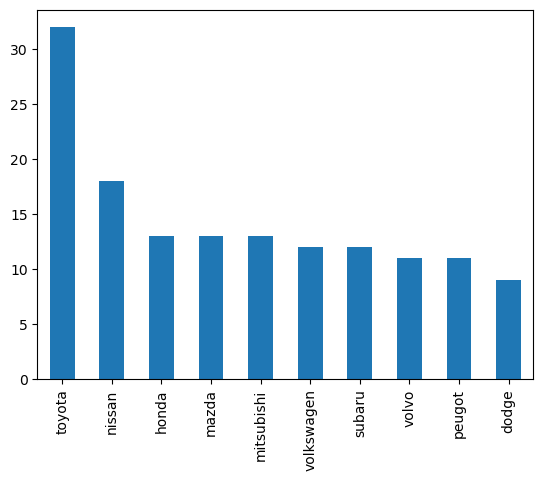

In [47]:
viz['make'].value_counts().head(10).plot.bar()
#As we can see TOYOTA is on the top, followed by NISSAN and HONDA

In [48]:
#We can also find about the most preferred body style

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:ylabel='body-style'>

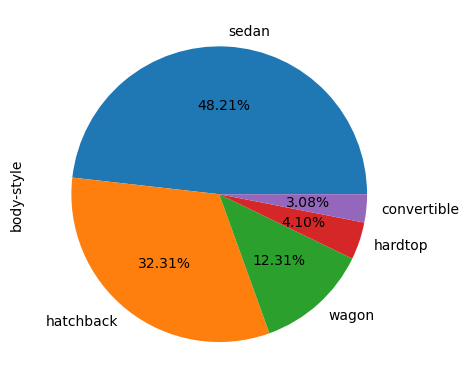

In [60]:
viz['body-style'].value_counts().plot.pie(autopct='%1.2f%%')


# Here (autopct='%1.2f%%), found to input the percentage value in pie chart

# Sedan body style is the most preferred body style in the data set

<AxesSubplot:xlabel='city-mpg', ylabel='fuel-type'>

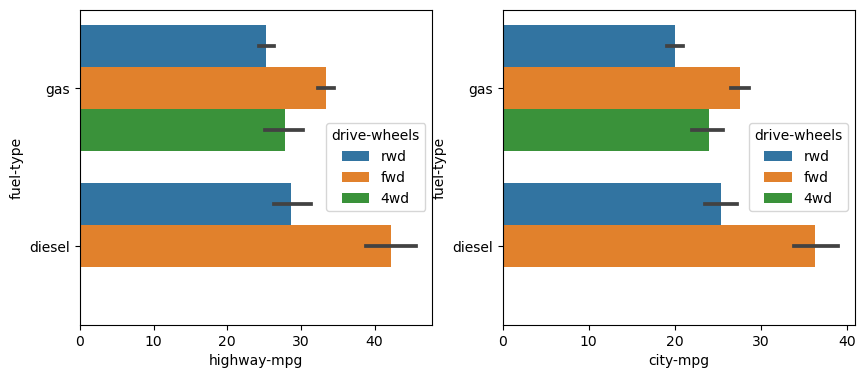

In [61]:
# finding out the most fuel efficient in city as well as on highways, regards to drive wheels of the vehicles.
plt.figure(figsize = (10,9))
plt.subplot(221)
sns.barplot(data = viz, x = 'highway-mpg', y = 'fuel-type', hue = 'drive-wheels' )
plt.subplot(222)
sns.barplot(data = viz, x = 'city-mpg', y = 'fuel-type', hue = 'drive-wheels')

Text(0.5, 1.0, 'Price-Horsepower Relation with Mileage on Highway')

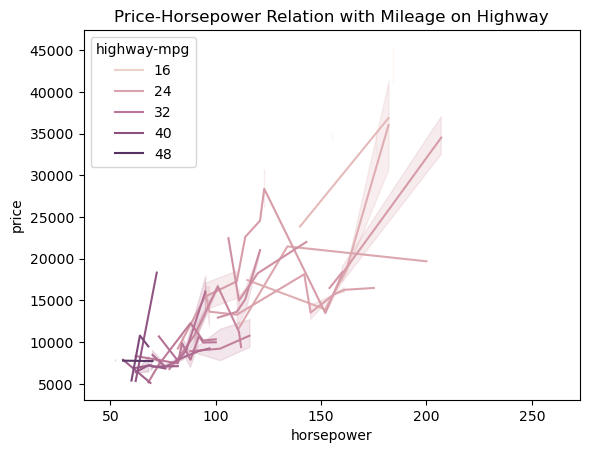

In [64]:
# In the below graph we found , that increase in horsepower of engine, causes increase in price
# as HP increases , Mileage of cars Decreases

sns.lineplot(data = viz, x = viz['horsepower'], y = viz['price'], hue = viz['highway-mpg'], err_style = 'band')
plt.title('Price-Horsepower Relation with Mileage on Highway')

Text(0.5, 0, 'Risk Factor Scale')

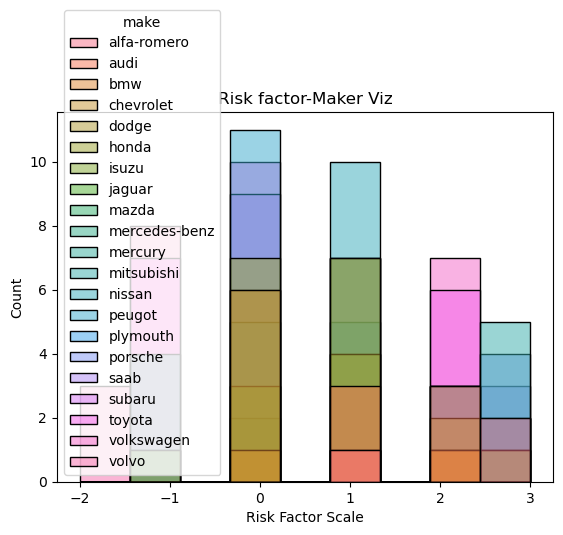

In [66]:
# the following graph shows the risk-factor of the makers from the given auto dataset
# -3 is the safest, +3 is the risky one
# from the plot, Alfa Romeo is the safest option, and after that Audi and Jaguar are the second safe cars

sns.histplot(data = viz, x = viz['symboling'], hue = viz['make'])
plt.title('Risk factor-Maker Viz')
plt.xlabel('Risk Factor Scale')

Text(0.5, 1.0, 'Make vs Loss')

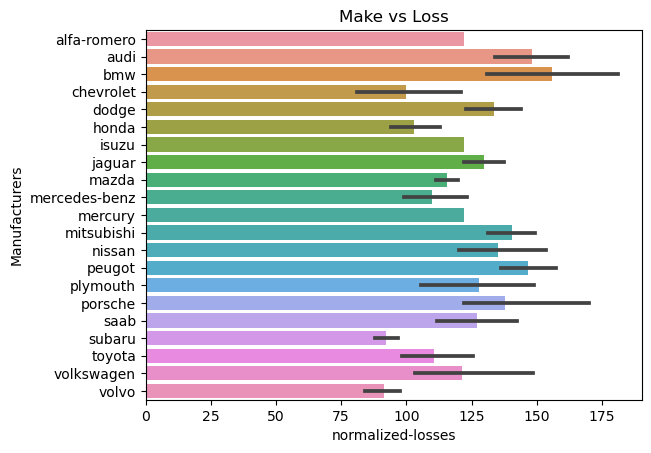

In [153]:
sns.barplot(x = viz['normalized-losses'], y = viz['make'] )
plt.ylabel('Manufacturers')
plt.title('Make vs Loss')

#Found BMW on most losses, Porshe on 2nd most loss etc

In [155]:
viz.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
symboling,1.000000,0.454447,-0.535565,-0.363063,-0.248580,-0.517540,-0.230350,-0.068284,-0.145823,-0.011971,-0.181258,0.072655,0.230597,0.011761,0.079514,-0.084118
normalized-losses,0.454447,1.000000,-0.046860,0.027179,0.089103,-0.358772,0.105333,0.139265,-0.030158,0.056387,-0.112238,0.216473,0.215851,-0.206930,-0.165178,0.135778
wheel-base,-0.535565,-0.046860,1.000000,0.879222,0.819009,0.592500,0.782720,0.569704,0.498228,0.171722,0.247730,0.375541,-0.352331,-0.499126,-0.566355,0.585793
length,-0.363063,0.027179,0.879222,1.000000,0.858084,0.496218,0.881665,0.687479,0.609437,0.118664,0.160172,0.583813,-0.280986,-0.689660,-0.719324,0.695331
width,-0.248580,0.089103,0.819009,0.858084,1.000000,0.315834,0.867315,0.740320,0.544311,0.186432,0.190997,0.616779,-0.251627,-0.647099,-0.692220,0.754273
height,-0.517540,-0.358772,0.592500,0.496218,0.315834,1.000000,0.307732,0.031286,0.189283,-0.055525,0.261160,-0.084412,-0.264078,-0.102367,-0.151188,0.138291
curb-weight,-0.230350,0.105333,0.782720,0.881665,0.867315,0.307732,1.000000,0.857573,0.645806,0.172785,0.155382,0.760285,-0.278944,-0.772171,-0.812710,0.835729
engine-size,-0.068284,0.139265,0.569704,0.687479,0.740320,0.031286,0.857573,1.000000,0.583091,0.211989,0.024617,0.842691,-0.219008,-0.710624,-0.732138,0.888942
bore,-0.145823,-0.030158,0.498228,0.609437,0.544311,0.189283,0.645806,0.583091,1.000000,-0.066793,0.003057,0.568527,-0.277662,-0.591950,-0.600040,0.546873
stroke,-0.011971,0.056387,0.171722,0.118664,0.186432,-0.055525,0.172785,0.211989,-0.066793,1.000000,0.199882,0.100040,-0.068300,-0.027641,-0.036453,0.093746


# CONCULSION TO THE ANALYSIS

1 -  We can see that BMW which is having the most amount of 'Normalised Loss' is on the risk-factor scale of (1) i.e RISKY

2 - Front Wheel Drive Vehicles either it be on Highway or City, gives the best mileage on-  Diesel and Gasoline both fuels

3 - (Sedan) body style is the most preferred body style in the data set.

4 - Toyota = The top manufacturer with good risk-factor

# DASHBOARD CREATION 

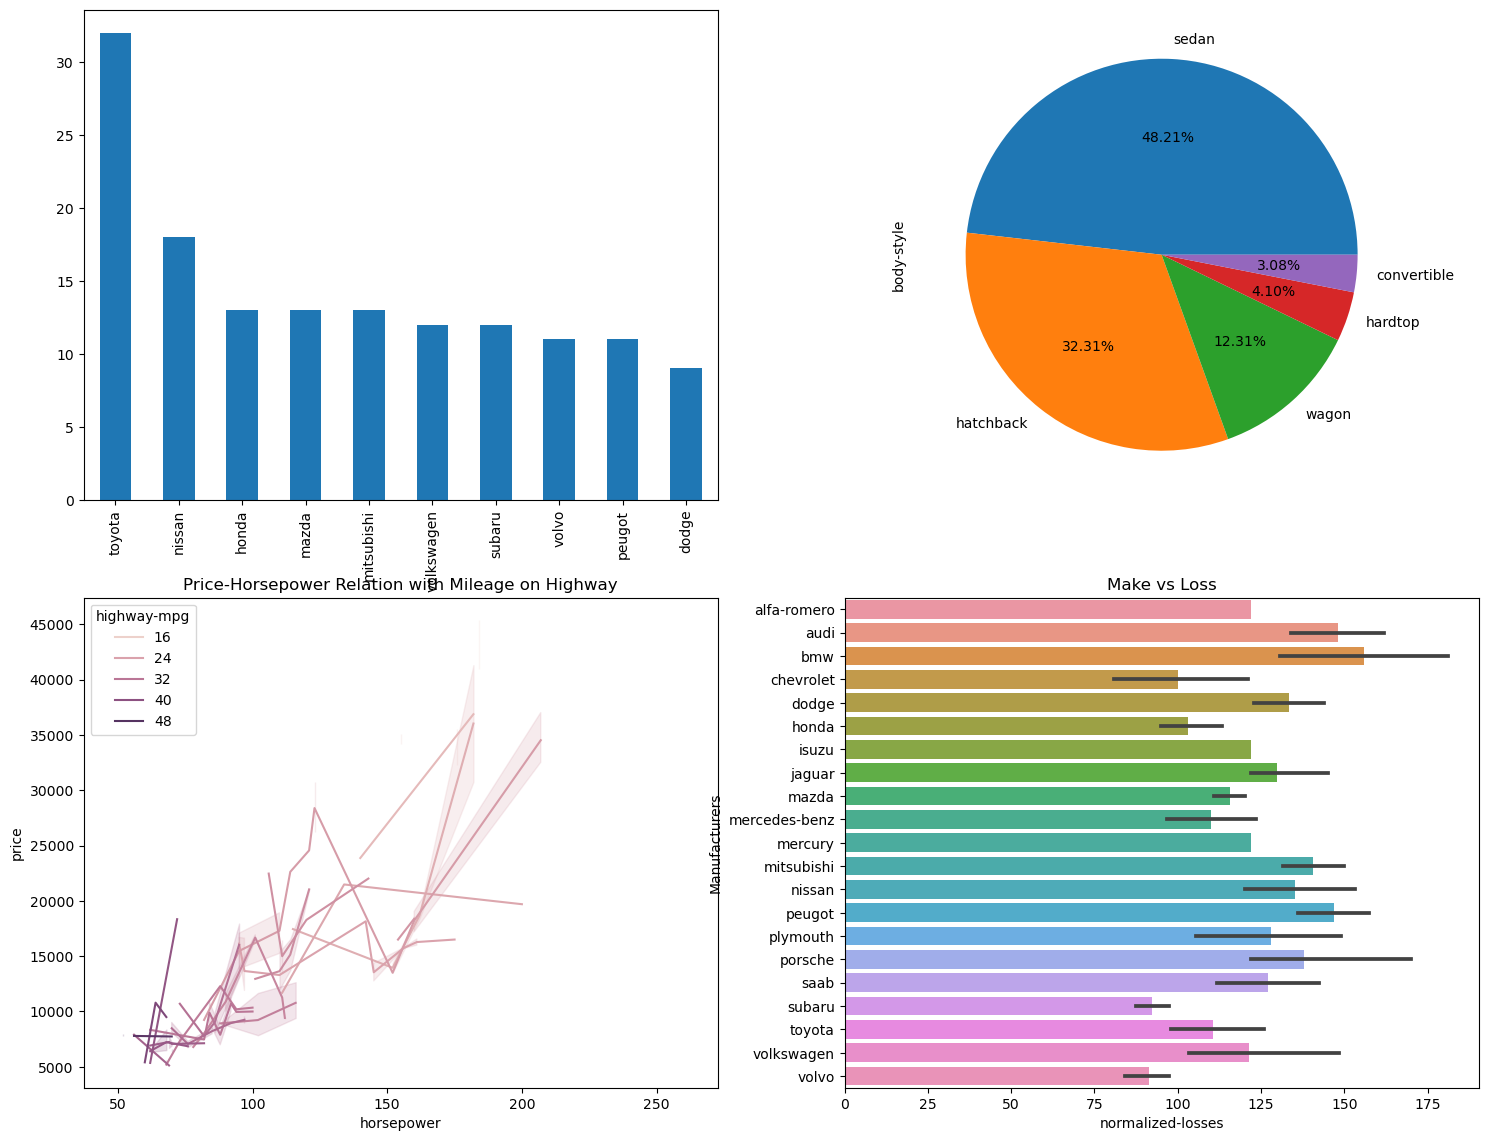

In [171]:
plt.figure(figsize = (18,14))
plt.subplot(221)
viz['make'].value_counts().head(10).plot.bar()

plt.subplot(222)
viz['body-style'].value_counts().plot.pie(autopct='%1.2f%%')


plt.subplot(223)
sns.lineplot(data = viz, x = viz['horsepower'], y = viz['price'], hue = viz['highway-mpg'], err_style = 'band')
plt.title('Price-Horsepower Relation with Mileage on Highway')

plt.subplot(224)
sns.barplot(x = viz['normalized-losses'], y = viz['make'] )
plt.ylabel('Manufacturers')
plt.title('Make vs Loss')
plt.savefig('saquib VIZ DASHBOARD.png')